# Einleitung 

DE:
Das Ziel dieses Projekts ist es, ein Deep-Learning-Modell zu entwickeln, das Gesichtsausdrücke präzise in eine von sieben Kategorien klassifizieren kann: **Wütend, Ekel, Angst, Glücklich, Traurig, Überraschung und Neutral**. 

Wir werden **Convolutional Neural Networks (CNNs) verwenden, da diese sich als effektiv bei Aufgaben der Bildklassifizierung erwiesen haben**. Unser Ansatz besteht darin, ein CNN-Modell von Grund auf mit dem FER-2013-Datensatz zu trainieren.

EN:
The goal of this project is to develop a deep learning model that can accurately classify facial expressions into one of seven categories: Angry, Disgust, Fear, Happy, Sad, Surprise, and Neutral. We will use convolutional neural networks (CNNs) to train our model, as they have been shown to be effective in image classification tasks. Our approach involves training a CNN model from scratch on the FER-2013 dataset

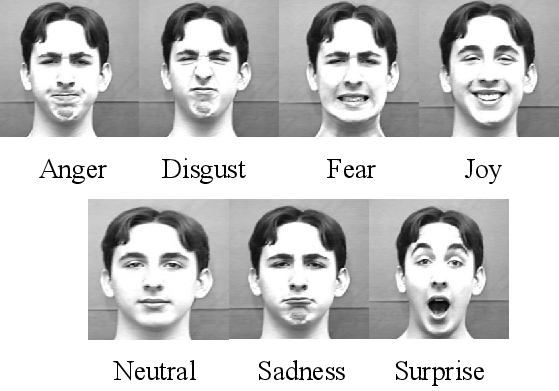



## 💾 Data

Das FER-2013-Dataset besteht aus 48x48 Pixel großen **Graustufenbildern** von Gesichtern, die automatisch so ausgerichtet wurden, dass sie **zentriert** sind und in jedem Bild eine **ähnliche Fläche** einnehmen. Das Dataset enthält 24.400 Bilder, wobei **22.968 Beispiele im Trainingssatz** und **1.432 Beispiele im öffentlichen Testsatz** enthalten sind.

# Preprocessing

In diesem Abschnitt werden wir sowohl **Daten-Generatoren** als auch **Daten-Augmentierung** verwenden, um ein **Deep-Learning-Modell** zur Erkennung menschlicher Emotionen mithilfe des FER-2013-Datensatzes zu trainieren. 

Aufgrund der Größe und Komplexität des Datensatzes wäre es unpraktisch, alle Bilder auf einmal in den Speicher zu laden. Daher werden wir **Daten-Generatoren** verwenden, um **während des Trainings Bilder in Batches zu generieren**, was es uns ermöglicht, unser Modell **effizient** auf dem gesamten Datensatz zu trainieren.



Zusätzlich werden wir **verschiedene Techniken der Daten-Augmentierung** auf die Trainingsbilder anwenden, wie zum Beispiel **Rotation**, **Verschiebung** und **Spiegelung**. Dies wird dazu beitragen, die **Größe und Vielfalt unseres Trainingssatzes zu erhöhen**, was die Leistung unseres Deep-Learning-Modells verbessern kann. 

Durch das **Einführen von Variabilität** in den Trainingsprozess kann **die Daten-Augmentierung auch dazu beitragen, Overfitting zu verhindern**, das auftritt, wenn das Modell zu stark auf den Trainingssatz zugeschnitten ist und bei neuen, unbekannten Daten schlecht abschneidet.

In [1]:
import os  # Funktionen bereitstellt, um mit dem Betriebssystem
import tensorflow as tf  #Open-Source-Framework für maschinelles Lernen und Deep Learning
from tensorflow.keras.preprocessing.image import ImageDataGenerator # importiert die Klasse ImageDataGenerator aus der Keras-Bibliothek in TensorFlow
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization # Weitere Klassen...
from tensorflow.keras.models import Sequential # importiert die Klasse Sequential aus der tensorflow-Bibliothek tensorflow.keras.models, die verwendet wird, um ein sequentielles Modell in Keras zu erstellen.

#os.chdir(os.path.dirname(os.path.abspath(__file__)))  # Setzt das Arbeitsverzeichnis auf das Verzeichnis des Skripts


layer = Dense(10)  # Eine Dense-Schicht mit 10 Neuronen erstellen
neuro = tf.keras.layers.Dense(10)

print("Bibliotheken laden erfolgreich.")

Bibliotheken laden erfolgreich.


#### Erklärung

Die Klasse **ImageDataGenerator()** erzeugt Bilddaten in Echtzeit und kann gleichzeitig verschiedene Vorverarbeitungsschritte oder Augmentierungen an diesen Daten vornehmen, während sie für das Training verwendet werden. Dadurch erhöht sie die Effizienz des Trainings, insbesondere bei großen Datensätzen, die nicht komplett in den Speicher passen.

In [2]:
train_dir = "./Training_Und_Test_Daten/train" # Directory containing the training data
test_dir = "./Training_Und_Test_Daten/test"  # Directory containing the validation data

print("Import erfolgreich.")

Import erfolgreich.


In [3]:
train_datagen = ImageDataGenerator(
    width_shift_range = 0.1,        # Zufälliges Verschieben der Breite von Bildern um bis zu 10%
    height_shift_range = 0.1,       # Zufälliges Verschieben der Höhe von Bildern um bis zu 10%
    horizontal_flip = True,         # Zufälliges horizontales Spiegeln der Bilder
    rescale = 1./255,               # Skalieren der Pixelwerte auf einen Bereich zwischen 0 und 1
    validation_split = 0.2          # 20% der Daten für die Validierung zurücklegen
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,               # Skalieren der Pixelwerte auf einen Bereich zwischen 0 und 1
    validation_split = 0.2          # 20% der Daten für die Validierung zurücklegen
)

print("Erfolgreiche Definition der Generatoren.")

Erfolgreiche Definition der Generatoren.


### Festlegen von der Batch-Größe, ... der beiden Datengeneratoren

- Trainingsdaten Generator
- Validierungsdaten-Generator

In [4]:
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,           # Directory containing the training data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch (Anzahl der Bilder, die in einem Schritt des Trainingsprozesses in das neuronale Netzwerk eingegeben werden)
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into categories
    subset = "training"              # Uses the training subset of the data
)

validation_generator = validation_datagen.flow_from_directory(
    directory = test_dir,            # Directory containing the validation data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "validation"            # Uses the validation subset of the data
)
print("")
print("Bilddaten erfolgreich geladen und für Training des neuronalen Netzwerks vorbereitet!")

#Erklärung:
#Die Methode train_datagen.flow_from_directory() wird verwendet, 
#um Bilddaten aus einem Verzeichnis zu laden und sie gleichzeitig 
#für das Training eines neuronalen Netzwerks vorzubereiten. 

#Sie ist Teil der ImageDataGenerator-Klasse in Keras und ermöglicht das effiziente Laden, 
#Vorverarbeiten und Augmentieren von Bilddaten in Echtzeit während des Trainings."


Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.

Bilddaten erfolgreich geladen und für Training des neuronalen Netzwerks vorbereitet!


## Erklärung: Zu Parametern der Methode *train_datagen.flow_from_directory()*

### Info zum Parameter *Batch*: 

Ein Batch ist eine **Untergruppe** des gesamten Datensatzes, die verwendet wird, um das Modell in einem Durchlauf (Iteration) zu trainieren. Statt das gesamte Dataset auf einmal durch das neuronale Netzwerk zu schicken (was sehr ressourcenintensiv wäre), wird der Datensatz in kleinere Gruppen (Batches) aufget

Warum wird ein Batch verwendet?

**Effizienz**: Es wäre sehr aufwendig, das Netzwerk nach jedem einzelnen Bild zu aktualisieren (dies wird als **"stochastic gradient descent"** bezeichnet). Ebenso wäre es ineffizient, das gesamte Dataset auf einmal zu verarbeiten (dies wird "batch gradient descent" genannt).

**Speichereinschränkungen**: Das Laden und Verarbeiten des gesamten Datensatzes auf einmal kann den Arbeitsspeicher **überlasten**, besonders bei großen Datensätzen. Durch das Aufteilen in Batches können Teile des Datensatzes nach und nach verarbeitet werden.

**Regulierung und Stabilität**: Ein Batch-Training bietet eine Balance zwischen der extremen Volatilität des stochastischen Gradientenabstiegs (Bild-für-Bild-Training) und der Trägheit des Batch-Gradientenabstiegs (gesamter Datensatz). Das hilft, die Genauigkeit und Stabilität des Trainings zu verbessern.

**Typischer Ablauf bei Batch-Verwendung:**
- Ein Batch (z.B. 64 Bilder) wird an das Modell übergeben.
- Das Modell berechnet die Ausgabe und die Verluste für diesen Batch.
- Die Gewichte des Modells werden basierend auf dem durchschnittlichen Verlust für diesen Batch aktualisiert.

### Info zum Parameter *class_mode* 

- Der Parameter weist das Modell an, die Bilder in eine von mehreren Kategorien zu klassifizieren, wobei die Anzahl der Kategorien durch die Anzahl der Unterordner im Verzeichnis festgelegt wird.
- class_mode="categorical" bedeutet, dass die Labels für die Bilder in verschiedene Kategorien fallen und als One-Hot-Encoding dargestellt werden. Jedes Bild gehört dabei genau einer Kategorie an.


Es verwendet zum Klassifizieren eine One-Hot-Encoding-Darstellung der Labels:
- One-Hot-Encoding ist eine Methode, um kategorische Labels in numerische Vektoren zu konvertieren, bei denen genau eine Position eine "1" ist und die anderen "0".
- Es wird in maschinellem Lernen häufig verwendet, um kategorische Daten in eine Form zu bringen, die von Modellen wie neuronalen Netzwerken verarbeitet werden kann.
- Es vermeidet, dass das Modell irrtümlich eine Rangfolge zwischen den Klassen interpretiert.

# Modeling 

## CNN Model

### Erklärung: CNN = Convolutional Neural Network (auf Deutsch: **Faltungsneuronales Netzwerk**)

DE:
- Um die CNN-Architektur zu entwickeln, beginnen wir mit der **Definition der Eingabeschicht** und der **Anzahl der Filter** in der ersten Faltungsschicht. Anschließend fügen wir **weitere Faltungsschichten mit einer zunehmenden Anzahl von Filtern** hinzu, gefolgt von **Max-Pooling-Schichten**, um die räumlichen Dimensionen der Merkmalskarten zu reduzieren.

Nach den Faltungsschichten werden wir vollständig verbundene Schichten mit **ReLU-Aktivierung** hinzufügen, um die Emotionen zu klassifizieren.

- Wir werden mit verschiedenen Anzahlen von **Faltungsschichten, Filtergrößen und vollständig verbundenen Schichten** experimentieren, um die Leistung des Modells zu optimieren. Zusätzlich verwenden wir Techniken wie **Dropout und Batch-Normalisierung**, um Overfitting zu verhindern und die Generalisierungsfähigkeit des Modells zu verbessern.

EN:
- To develop the CNN architecture, we will begin by defining the input layer and the number of filters in the first convolutional layer. Then, we will add additional convolutional layers with increasing numbers of filters, followed by max-pooling layers to reduce the spatial dimensions of the feature maps. After the convolutional layers, we will add fully connected layers with ReLU activation to classify the emotions.
- We will experiment with different numbers of convolutional layers, filter sizes, and fully connected layers to optimize the model performance. Additionally, we will use techniques such as dropout and batch normalization to prevent overfitting and improve the generalization capability of the model.

### Define the model architecture: 

**Sequential-Modell** (Schichten werden nacheinander hinzugefügt, wie folgt:)

Dieser Code definiert die Architektur eines **Convolutional Neural Networks (CNN) für die Bildverarbeitung**. Es handelt sich um ein **tiefes neuronales Netzwerk** bzw. einem **Sequential-Modell mit 6 Faltungsschichten (Convolutional Layers), 6 Batch-Normalisierung,3  Max-Pooling und 3 Dropout-Schichten**. 

Das Ziel dieser Architektur ist es, Merkmale aus Bildern zu extrahieren und gleichzeitig Überanpassung (Overfitting) zu vermeiden, indem die Modellkomplexität durch Batch-Normalisierung und Dropout reduziert wird.


Dieses Modell ist eine typische CNN-Architektur, die für die Verarbeitung von Bilddaten verwendet wird. 

- Die Schichtenkombination von Faltungsschichten (zur Extraktion von Bildmerkmalen), 
- Batch-Normalisierung (zur Normalisierung und Stabilisierung des Trainings), 
- Max-Pooling (zur Reduktion der räumlichen Dimensionen) und 
- Dropout (zur Verhinderung von Overfitting) 

führt zu einem leistungsfähigen Modell, das in der Lage ist, Bilder effizient zu klassifizieren.

In [5]:
# Define the model architecture
# (from tensorflow.keras.models import Sequential)
from tensorflow.keras.layers import Input

model = Sequential()

model.add(Input(shape=(48, 48, 1)))

# Add a convolutional layer with 32 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

# Add a batch normalization layer
model.add(BatchNormalization())

# Add a second convolutional layer with 64 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Add a second batch normalization layer
model.add(BatchNormalization())

# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a third convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# Add a third batch normalization layer
model.add(BatchNormalization())

#4
# Add a fourth convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# Add a fourth batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a fifth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a fifth batch normalization layer
model.add(BatchNormalization())

# Add a sixth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a sixth batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))


print("neuronalen Netzwerks definiert!")

neuronalen Netzwerks definiert!


### Draw the CNN

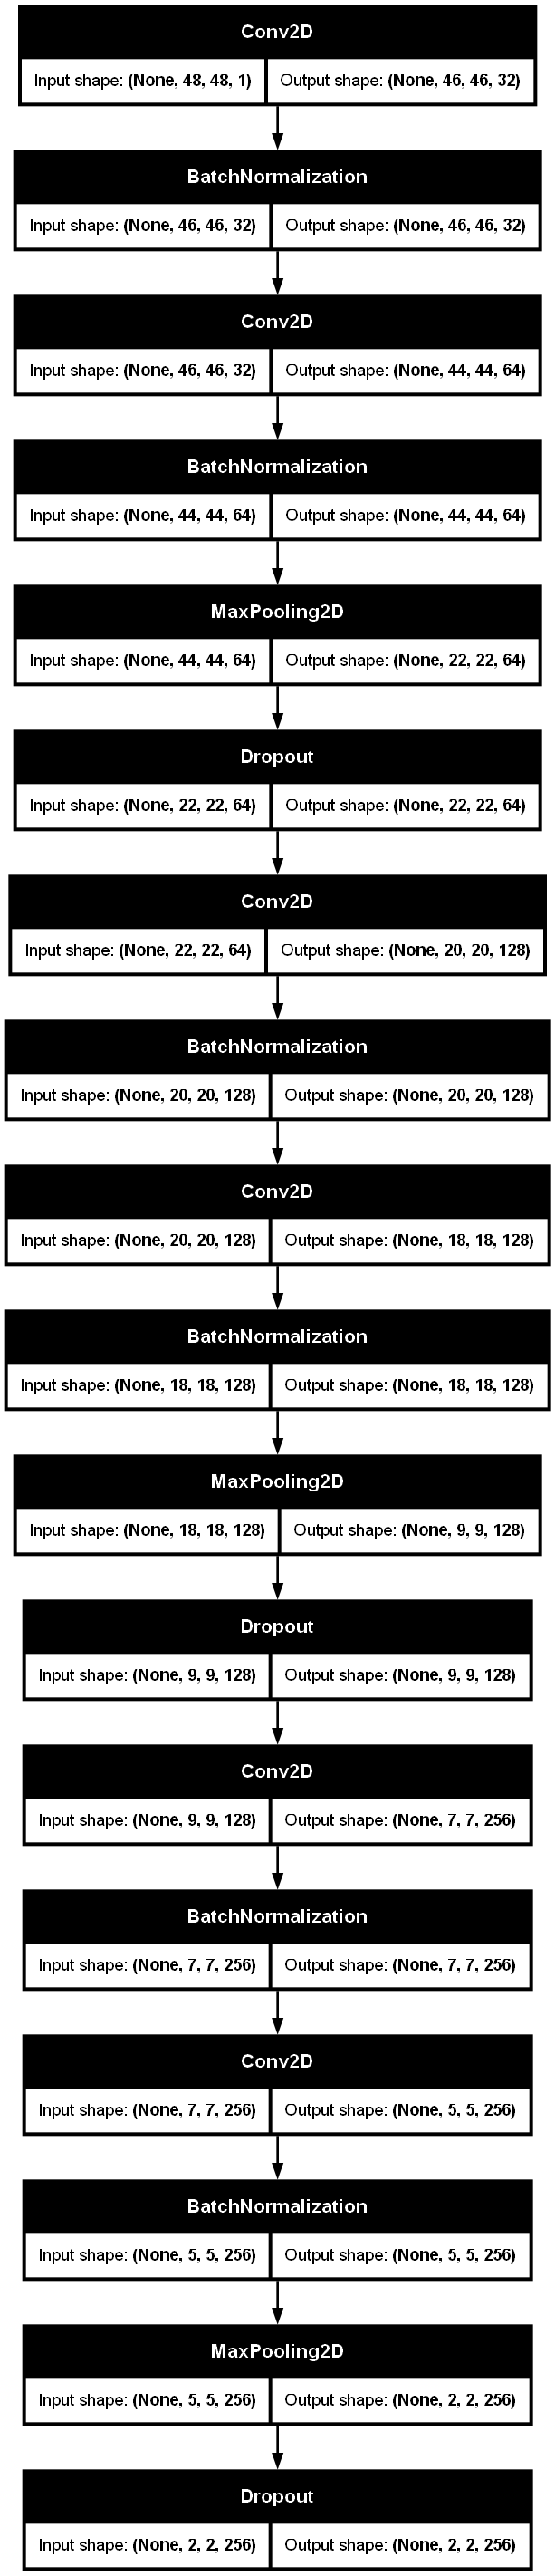

In [6]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, dpi=96)


### Umwandlung der Faltungsschichten --> in vollständig verbundene Schichten (Dense Layers) 

Folgender Codeblock fügt dem neuronalen Netzwerk zusätzliche Schichten hinzu, um die Ausgabe der vorherigen Faltungsschichten in vollständig verbundene Schichten (Dense Layers) zu überführen.

Gesamtübersicht des Codes:
Dieser Codeblock fügt die Endschichten zu einem **Convolutional** Neural Network (CNN) hinzu, das auf Klassifizierungsaufgaben trainiert wird. 

1. Die Ausgabe der Faltungsschichten wird zunächst in einen Vektor umgewandelt,
2. bevor sie durch zwei vollständig verbundene Schichten (Dense Layers) geleitet wird.

Info: Eine der Schichten hat 256 Neuronen, die mit der ReLU-Aktivierungsfunktion arbeiten, während die letzte Schicht 7 Neuronen mit der Softmax-Aktivierungsfunktion hat, um eine mehrklassenbasierte Wahrscheinlichkeitsverteilung zu berechnen. 

Es werden Batch-Normalisierung und Dropout verwendet, um den Lernprozess zu stabilisieren und Overfitting zu verhindern.


In [7]:
# Flatten the output of the convolutional layers

model.add(Flatten())
# Add a dense layer with 256 neurons and relu activation function
model.add(Dense(256, activation='relu'))
# Add a seventh batch normalization layer
model.add(BatchNormalization())
# Add a dropout layer with 0.5 dropout rate
model.add(Dropout(0.5))
# Add a dense layer with 7 neurons (one for each class) and softmax activation function
model.add(Dense(7, activation='softmax'))

print("Neuronale Faldungsschichten werden sind erfolgreich in verbundene Schichten umgewandelt worden!")

Neuronale Faldungsschichten werden sind erfolgreich in verbundene Schichten umgewandelt worden!


##### Detailierte Erklärung:

## Modell-Kompilierung mit kategorialem Kreuzentropie-Verlust, Adam-Optimierer und Genauigkeits-Metrik

Folgender Code definiert, wie das neuronale Netzwerk trainiert werden soll:

- Es verwendet **kategoriale Kreuzentropie als Verlustfunktion**, um das Modell zu trainieren, Wahrscheinlichkeiten für mehrere Klassen korrekt zuzuordnen.
- Der **Adam-Optimierer** wird mit einer kleinen Lernrate verwendet, um effizient und stabil zu lernen.
Während des Trainings wird die Genauigkeit als Metrik verfolgt, um die Leistung des Modells zu bewerten.

In [8]:
# Compile the model with categorical cross-entropy loss, adam optimizer, and accuracy metric
model.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

print("Neuronales Netzwerkmodell ist erfolgreich kompiliert/ und ready for training!")

Neuronales Netzwerkmodell ist erfolgreich kompiliert/ und ready for training!


### Callbacks

Jetzt erstmal "epochs=1"  eigentlich sollte es 50 Epochen durchlaufen werden!

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the callback
checkpoint_callback = ModelCheckpoint(
    filepath='model_weights.weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

# Train the model with the callback
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=1,   # Hier sollen 50 Epochen durchlaufen werden
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint_callback]
)

C:\Users\flori\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1739 - loss: 2.9780

C:\Users\flori\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.14665, saving model to model_weights.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 533s 1s/step - accuracy: 0.1740 - loss: 2.9776 - val_accuracy: 0.1466 - val_loss: 2.1050


# Training --> Then Evaluation --> Then Validation and loss curves

## Training and validation loss curves

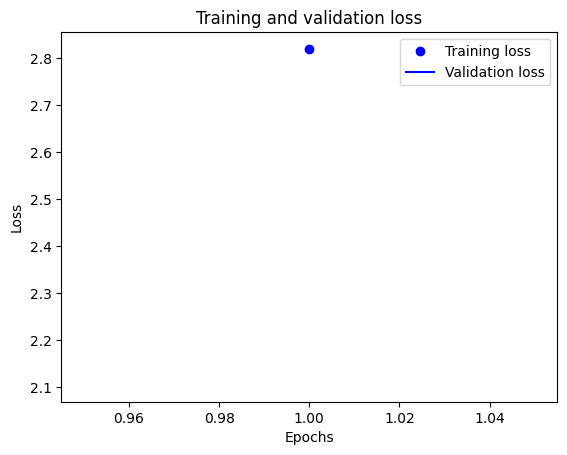

In [11]:
# Plot the train and validation loss
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Training and validation accuracy curves

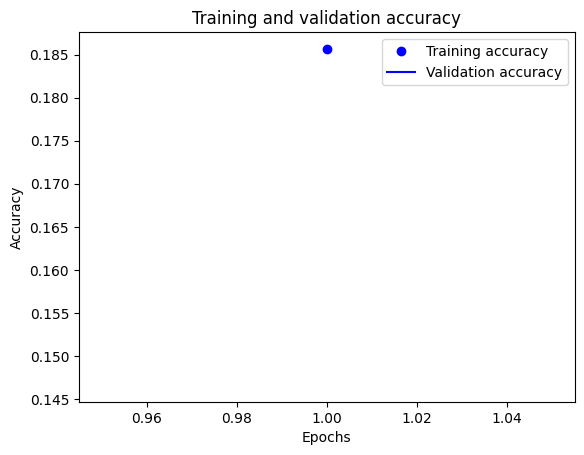

In [12]:
# Plot the train and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Confusion Matrix

In [ ]:
!pip install scikit-learn

23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 316ms/step


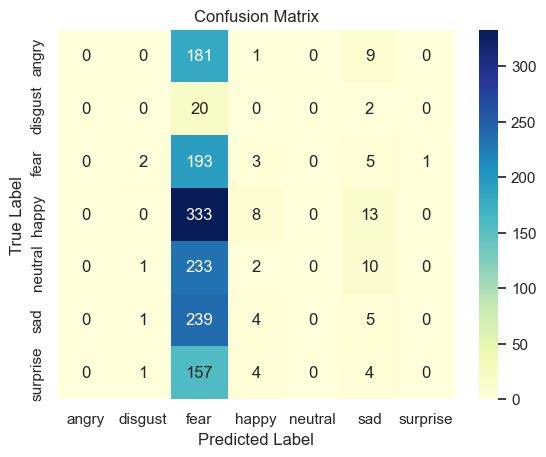

In [17]:
import seaborn as sns 
import numpy as np
from sklearn.metrics import confusion_matrix

# Get the true labels and predicted labels for the validation set
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_generator.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()